In [ ]:
import networkx as nx

In [ ]:
elist = create_uniform_graph(16,1.3)
elist

In [ ]:
x = nx.Graph()
x = x.add_edges_from(elist)
x

In [ ]:
x.edges

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
colors = []
for i in range(16):
    if(np.random.rand() < 0.5):
        colors.append(0)
    else:
        colors.append(1)
    G.add_node(i, weight=weight)
G.add_edges_from(elist)
nx.draw(G, pos=nx.circular_layout(G), node_color=colors, cmap=plt.get_cmap('viridis'), vmin=0, vmax=1, with_labels=True)

In [ ]:
G = nx.DiGraph()
colors = []
for i in range(16):
    if(np.random.rand() < 0.5):
        colors.append(0)
    else:
        colors.append(1)
    G.add_node(i, weight=weight)
G.add_edges_from(elist)
nx.draw(G, pos=nx.circular_layout(G), node_color=colors, cmap=plt.get_cmap('viridis'), vmin=0, vmax=1, with_labels=True)

In [ ]:
G.adjacency()

# EXPERIMENTS

In [1]:
from pybn.networks import BooleanNetwork, FuzzyBooleanNetwork
from pybn.graphs import create_uniform_graph
from pybn.observers import EntropyObserver, FamiliesObserver
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Main parameters
nodes = 16
runs = 4
steps = 128
transcient = 128
repetitions = 25

In [3]:
def experiment(nodes, average_connectivity, runs, steps, transcient):

    # Create a graph.
    graph = create_uniform_graph(nodes, average_connectivity)

    # Initialize the network.
    network = BooleanNetwork(nodes, graph)

    # Attach an observer.
    observers = [EntropyObserver(nodes=nodes, runs=runs)] 
    network.attach_observers(observers)

    # Perform several runs.
    for _ in range(runs):

        # Set a random initial state.
        network.set_initial_state(observe=False)

        # Perform several pre-warm and unobserved steps.
        for _ in range(transcient):
            network.step(observe=False)

        # Pass the last state to the observers.
        network.update_observers()

        # Perform several observebed steps.
        for _ in range(steps):
            network.step(observe=True)

    # Get observer's summary.
    return network.observers[0].entropy()[0]

In [4]:
def experiment_fuzzy(nodes, average_connectivity, base, runs, steps, transcient):

    # Create a graph.
    graph = create_uniform_graph(nodes, average_connectivity)

    # Initialize the network.
    network = FuzzyBooleanNetwork(nodes, base, graph)

    # Attach an observer.
    observers = [EntropyObserver(nodes=nodes, runs=runs, base=base)] 
    network.attach_observers(observers)

    # Perform several runs.
    for _ in range(runs):

        # Set a random initial state.
        network.set_initial_state(observe=False)

        # Perform several pre-warm and unobserved steps.
        for _ in range(transcient):
            network.step(observe=False)

        # Pass the last state to the observers.
        network.update_observers()

        # Perform several observebed steps.
        for _ in range(steps):
            network.step(observe=True)
            
    # Get observer's summary.
    return network.observers[0].entropy()[0]

100%|██████████| 25/25 [00:25<00:00,  1.02s/it]


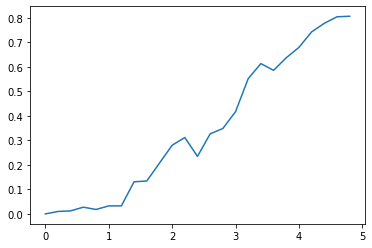

In [5]:
entropy = []
for k in tqdm(np.arange(0,5,0.2)):
    k_entropy = []
    for rep in range(repetitions):
        k_entropy.append(experiment(nodes, k, runs, steps, transcient))
    entropy.append(np.mean(k_entropy))

plt.plot(np.arange(0,5,0.2), entropy)
plt.savefig('entropy.png')

100%|██████████| 4/4 [02:08<00:00, 32.16s/it]


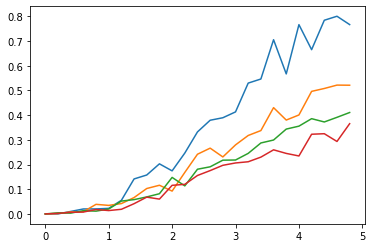

In [6]:
base_entropies = []
for base in tqdm(range(2,6)):
    entropy = []
    for k in np.arange(0,5,0.2):
        k_entropy = []
        for rep in range(repetitions):
            k_entropy.append(experiment_fuzzy(nodes, k, base, runs, steps, transcient))
        entropy.append(np.mean(k_entropy))
    base_entropies.append(entropy)

for base in range(len(base_entropies)):
    plt.plot(np.arange(0,5,0.2), base_entropies[base])
plt.savefig('entropy2.png')
